In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load
#importing packages

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-sms-detection/spam.csv


In [2]:
df = pd.read_csv("/kaggle/input/spam-sms-detection/spam.csv", encoding="ISO-8859-1")
df.shape

(5572, 5)

In [3]:
df['spam'] = df['v1'].apply(lambda x: 0 if x == "ham" else 1)

In [4]:
df = df.drop(['v1','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [5]:
df.head()

,v2,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


### From the above information this is out Dataset Description:

* Variable	Description
* v2	Text SMS.
* spam	target, its labeling that sms is spam or not.

In [6]:
df.isnull().sum()

v2      0
spam    0
dtype: int64

In [7]:
df.describe(include=object).T

,count,unique,top,freq
v2,5572,5169,"Sorry, I'll call later",30


In [8]:
df.duplicated().sum()

403

In [9]:
df.drop_duplicates(keep='first',inplace=True)

## Visualization

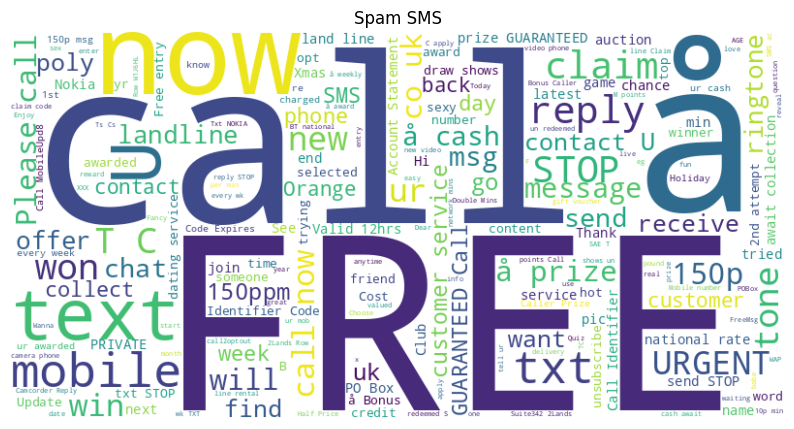

In [10]:
spam_df = df[df['spam'] == 1]
spam_text = ' '.join(spam_df['v2'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam SMS')
plt.show()

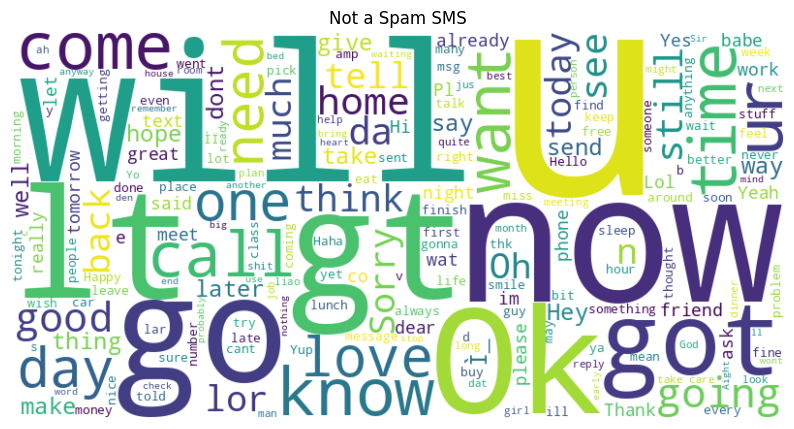

In [11]:
spam_df = df[df['spam'] == 0]
spam_text = ' '.join(spam_df['v2'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Not a Spam SMS')
plt.show()

In [12]:
X , y = df['v2'] ,df['spam']

## Data split

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [14]:
print(len(X_train))
print(len(X_test))

4135
1034


## Feature Extraction

In [15]:
vectorizer = TfidfVectorizer(stop_words="english",max_df=0.7)
X_train_vertorized = vectorizer.fit_transform(X_train)
X_test_vertorized = vectorizer.transform(X_test)

## Spam Detection
I will be using the following models:

* LinearSVC
* Random Forest Classifier
* XGBClassifier

## Linear Support Vector Classifier (LinearSVC)

In [16]:
clf = LinearSVC()
clf.fit(X_train_vertorized,y_train)

LinearSVC()

In [17]:
y_pred = clf.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print()
print("precision score: ", precision_score(y_test, y_pred))

accuracy Score:  0.9825918762088974

confusion matrix: 
[[887   2]
 [ 16 129]]

precision score:  0.9847328244274809


In [18]:
data_frame = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
data_frame

,actual,predicted
1617,0,0
2064,0,0
1272,0,0
3020,0,0
3642,0,0
...,...,...
4146,0,0
1208,0,0
4795,1,1
3575,0,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Model Performance')

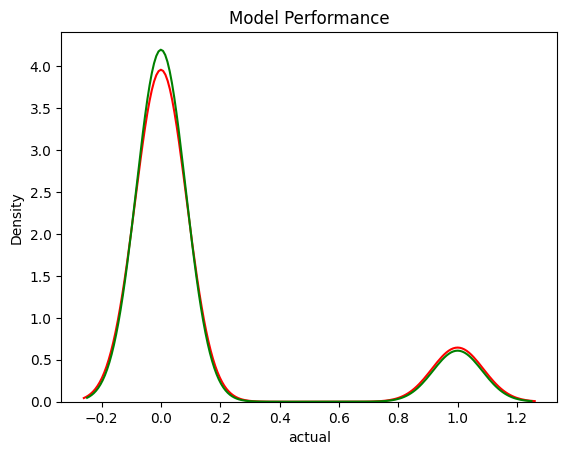

In [19]:
ax = sns.kdeplot(data_frame['actual'], color='r', label='Actual Price')
sns.kdeplot(data_frame['predicted'], color='g', label='Predicted Price', ax=ax)
plt.title("Model Performance")

The Red shows the distribution count for actual values and the Green line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

## Other Models

In [20]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train_vertorized,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [21]:
xgb = XGBClassifier(n_estimators=50,random_state=2)
xgb.fit(X_train_vertorized,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [22]:
y_pred2 = rfc.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred2))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred2))
print()
print("precision score: ", precision_score(y_test, y_pred2))

accuracy Score:  0.9777562862669246

confusion matrix: 
[[889   0]
 [ 23 122]]

precision score:  1.0


In [23]:
y_pred1 = xgb.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred1))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred1))
print()
print("precision score: ", precision_score(y_test, y_pred1))

accuracy Score:  0.971953578336557

confusion matrix: 
[[887   2]
 [ 27 118]]

precision score:  0.9833333333333333


## Model Testing

After evaluating various classifier models, including LinearSVM, Random Forest Classifier, and XGBClassifier, for detecting spam SMS.

* Im going to proceed with testing using the Linear Support Vector Machine (LinearSVM) on our existing data.
* you can try with another data to test our models.

In [24]:
with open("mytext.txt","w") as fl:
    fl.write(X_test.iloc[2])

In [25]:
with open("mytext.txt","r") as fl:
    text = fl.read()

text

'Ok...'

In [26]:
vector_text = vectorizer.transform([text])

In [27]:
clf.predict(vector_text)

array([0])

In [28]:
y_test.iloc[2]

0

As evident from our evaluation, the performance of our detection model has been outstanding.

## Conclusion
I have used Classifier models - LinearSVM, Random Forest Classifier and XGBClassifier for detecting the spam SMS.
* The LinearSVM has performed well with the accuracy of 98%